# EDA for e-commerce customer churn

In [44]:
### importing libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [46]:
#importing dataset
df = pd.read_csv('E Commerce Dataset.csv')

In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


## Data Description

- **CustomerID**: Unique customer ID  
- **Churn**: Churn Flag  
- **Tenure**: Tenure of customer in organization  
- **PreferredLoginDevice**: Preferred login device of customer  
- **CityTier**: City tier  
- **WarehouseToHome**: Distance between warehouse and home of customer  
- **PreferredPaymentMode**: Preferred payment method of customer  
- **Gender**: Gender of customer  
- **HourSpendOnApp**: Number of hours spent on mobile application or website  
- **NumberOfDeviceRegistered**: Total number of devices registered on a particular customer  
- **PreferedOrderCat**: Preferred order category of customer in the last month  
- **SatisfactionScore**: Satisfactory score of customer on service  
- **MaritalStatus**: Marital status of customer  
- **NumberOfAddress**: Total number of addresses added on a particular customer  
- **Complain**: Any complaint raised in the last month  
- **OrderAmountHikeFromLastYear**: Percentage increase in orders from last year  
- **CouponUsed**: Total number of coupons used in the last month  
- **OrderCount**: Total number of orders placed in the last month  
- **DaySinceLastOrder**: Days since the last order by customer  
- **CashbackAmount**: Average cashback in the last month  


In [49]:
df.shape

(5630, 20)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [51]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

In [52]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


In [53]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [54]:
#Null Values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [55]:
# %null values
df.isnull().sum()*100/len(df)

CustomerID                     0.000000
Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

### Classification of Features

#### Numerical Features
- **Discrete:**
  - `CustomerID`: Unique identifier for each customer (countable).
  - `Churn`: Indicates whether the customer churned or not (binary: 0 or 1).
  - `NumberOfDeviceRegistered`: Count of devices registered by the customer (countable).
  - `SatisfactionScore`: Score on a discrete scale (countable).
  - `NumberOfAddress`: Count of addresses registered (countable).
  - `Complain`: Indicates whether a complaint was made (binary: 0 or 1).
  - `CouponUsed`: Number of coupons used (countable).
  - `OrderCount`: Number of or
  - `DaysSinceLastOrder` : Days since last order  
countable).

- **Continuous:**
  - `Tenure`: Length of time the customer has been active (can take any value, including fractional).
  - `WarehouseToHome`: Distance from warehouse to home (continuous).
  - `HourSpendOnApp`: Hours spent on the app (can take any fractional value).
  - `OrderAmountHikeFromlastYear`: Percentage or value of increase in order amount from last y
    - `CashbackAmount`: Cashback value received (continuous).eaived (continuous).

#### Categorical Features
- **Ordinal:**
  - `CityTier`: Represents customer location tiers (1, 2, 3, etc.), where the order matters.
  - `SatisfactionScore`: Can be interpreted as ordinal if treated as satisfaction levels (1 to 5, etc.).

- **Nominal:**
  - `PreferredLoginDevice`: Device used to log in (e.g., mobile, desktop), categories have no order.
  - `PreferredPaymentMode`: Mode of payment (e.g., card, net banking), categories have no order.
  - `Gender`: Gender of the customer (e.g., male, female), categories have no order.
  - `PreferedOrderCat`: Preferred category of order (e.g., electronics, fashion), categories have no order.
  - `MaritalStatus`: Marital status (e.g., single, marriedOrderCat`
  - `MaritalStatus`


## UNIVARIATE ANALYSIS

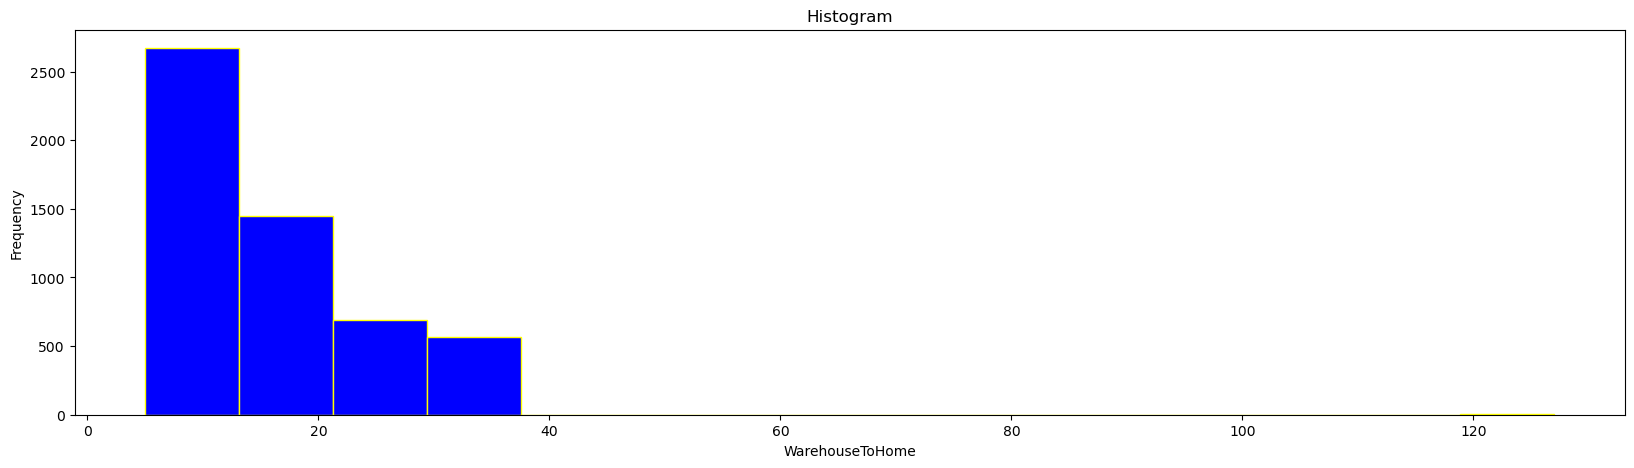

In [56]:
#Histogram
plt.figure(figsize=(20,5))
plt.hist(df['WarehouseToHome'], bins =15, color='blue', edgecolor = 'yellow')
plt.title('Histogram')
plt.xlabel('WarehouseToHome')
plt.ylabel('Frequency')
plt.show()
           

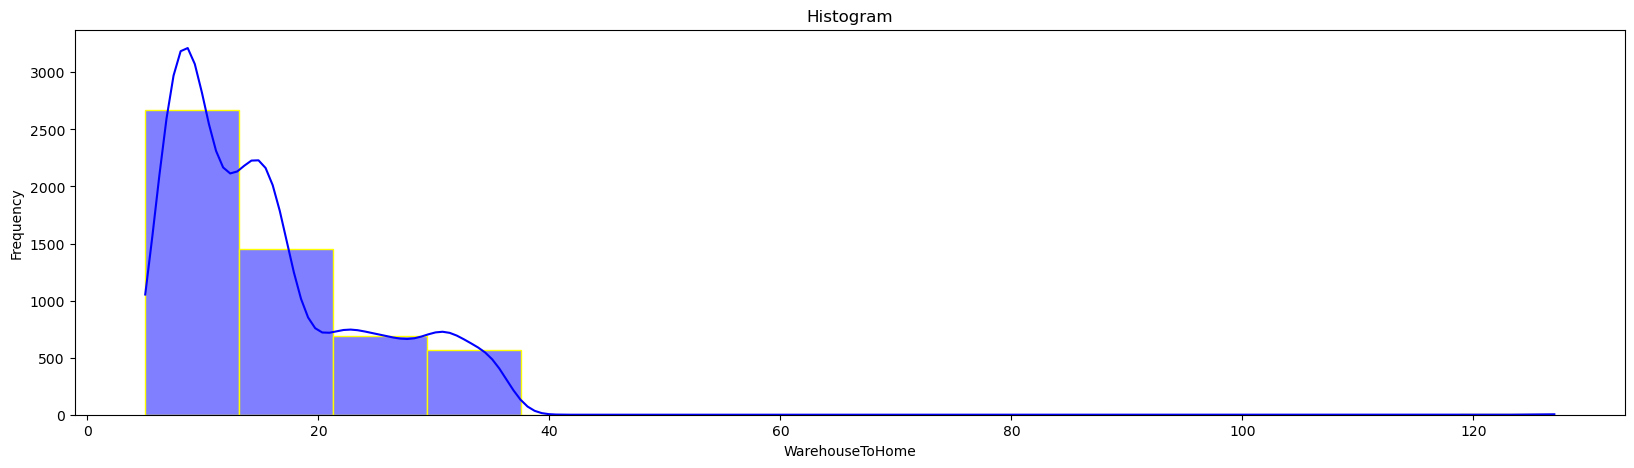

In [57]:


# Histogram with KDE using seaborn
plt.figure(figsize=(20, 5))
sns.histplot(df['WarehouseToHome'], bins=15, color='blue', edgecolor='yellow', kde=True)
plt.title('Histogram')
plt.xlabel('WarehouseToHome')
plt.ylabel('Frequency')
plt.show()


<Figure size 5000x1500 with 0 Axes>

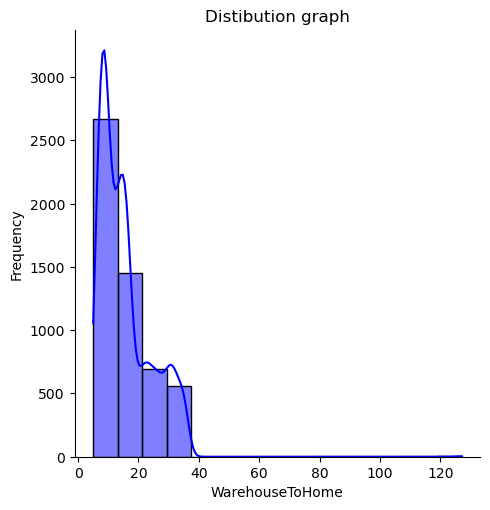

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram with KDE using seaborn
plt.figure(figsize=(50, 15))
sns.displot(df['WarehouseToHome'], bins=15, color='blue', kde=True)
plt.title('Distibution graph')
plt.xlabel('WarehouseToHome')
plt.ylabel('Frequency')
plt.show()


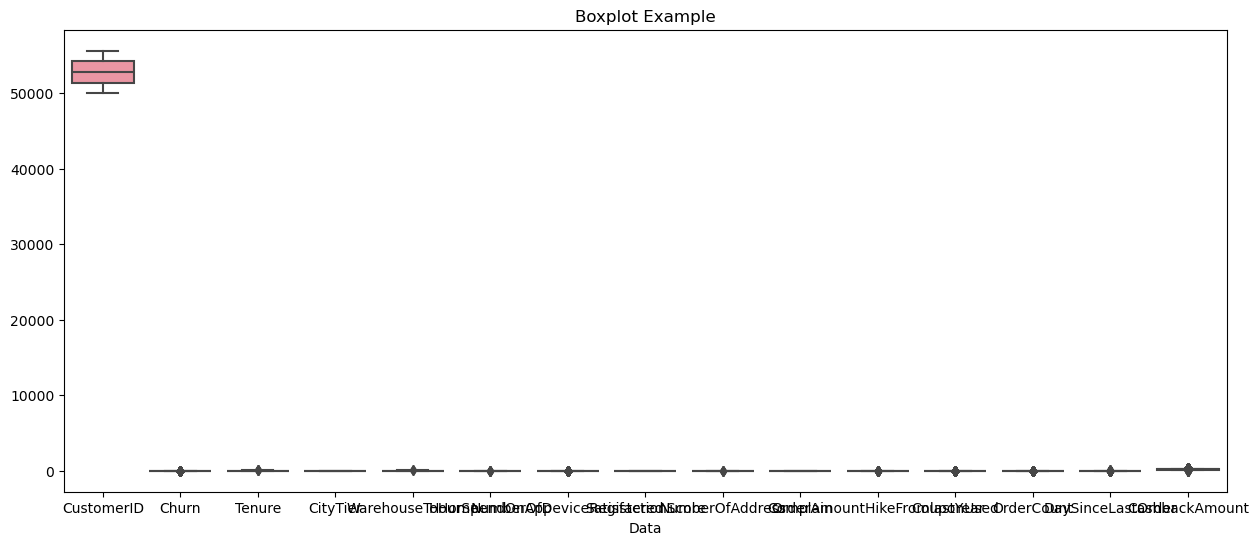

In [59]:
# Create a boxplot
plt.figure(figsize=(15, 6))
sns.boxplot(data=df)

# Add title and labels
plt.title('Boxplot Example')
plt.xlabel('Data')

# Show the plot
plt.show()

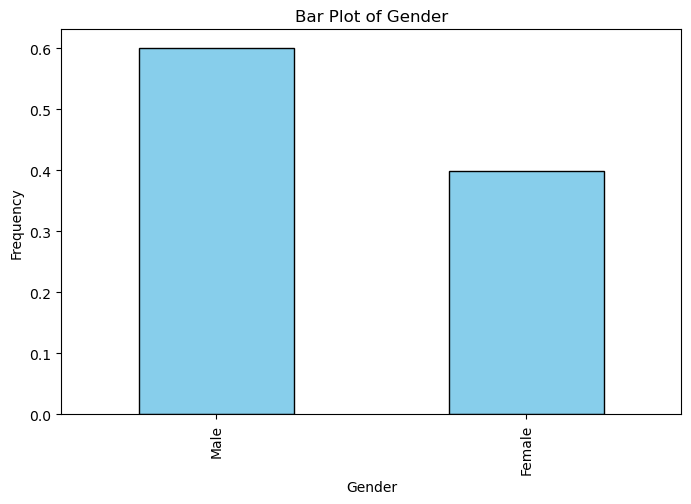

In [60]:
# Basic Bar Plot
plt.figure(figsize=(8, 5))
df['Gender'].value_counts(normalize = True).plot(kind='bar', color='skyblue', edgecolor='black')


# Adding labels and title
plt.title('Bar Plot of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

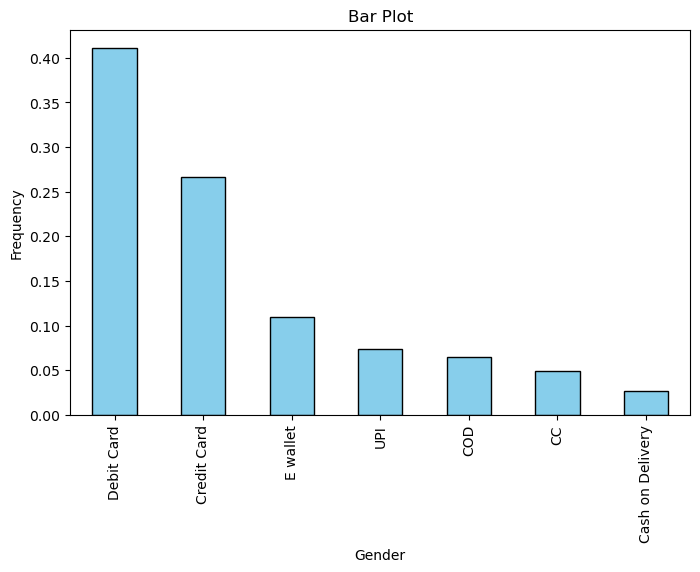

In [61]:
# Basic Bar Plot
plt.figure(figsize=(8, 5))
df['PreferredPaymentMode'].value_counts(normalize = True).plot(kind='bar', color='skyblue', edgecolor='black')


# Adding labels and title
plt.title('Bar Plot')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

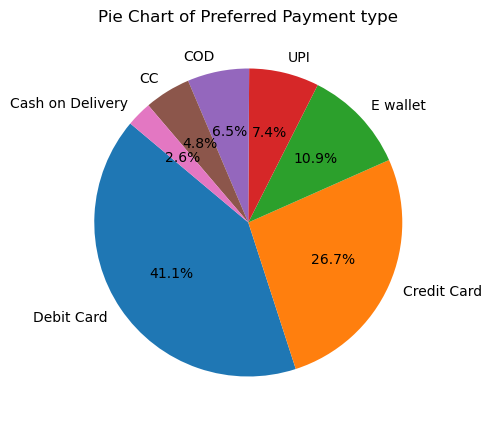

In [62]:
# Advanced Pie Chart
plt.figure(figsize=(8, 5))
df['PreferredPaymentMode'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Adding labels and title
plt.title('Pie Chart of Preferred Payment type')
plt.ylabel('')
plt.show()

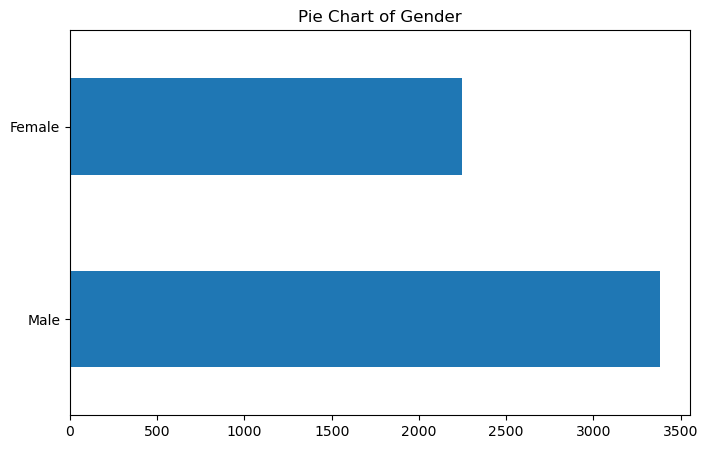

In [63]:

plt.figure(figsize=(8, 5))
df['Gender'].value_counts().plot.barh()

# Adding labels and title
plt.title('Pie Chart of Gender')
plt.ylabel('')
plt.show()

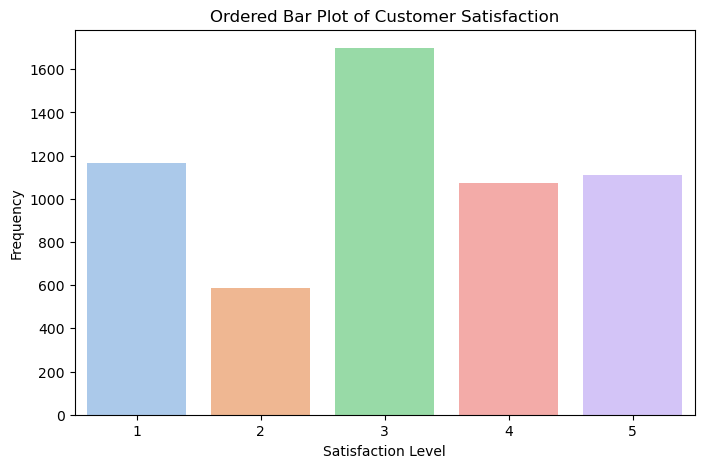

In [64]:
# Define the order for the plot based on numeric data
order = [1, 2, 3, 4, 5]

# Basic Ordered Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='SatisfactionScore', data=df, order=order, palette='pastel')

# Adding labels and title
plt.title('Ordered Bar Plot of Customer Satisfaction')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()


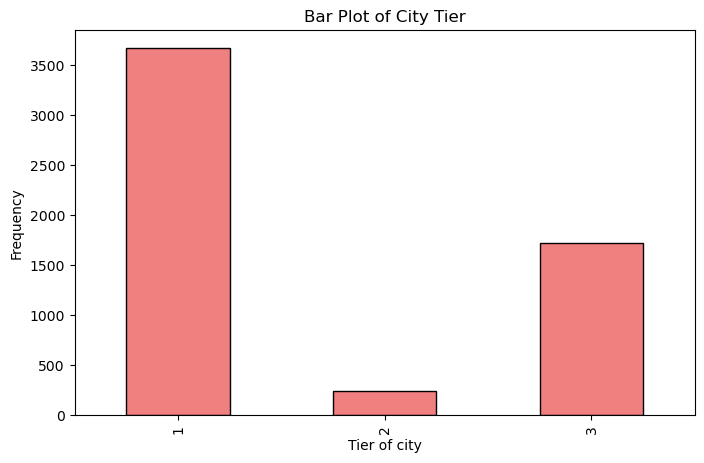

In [65]:
# Basic Bar Plot
plt.figure(figsize=(8, 5))
df['CityTier'].value_counts().sort_index().plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding labels and title
plt.title('Bar Plot of City Tier')
plt.xlabel('Tier of city')
plt.ylabel('Frequency')
plt.show()

## BIVARIATE ANALYSIS

                               Tenure  WarehouseToHome  HourSpendOnApp  \
Tenure                       1.000000        -0.018218       -0.021226   
WarehouseToHome             -0.018218         1.000000        0.060990   
HourSpendOnApp              -0.021226         0.060990        1.000000   
OrderAmountHikeFromlastYear  0.005825         0.038795        0.106843   
CouponUsed                   0.129035        -0.003935        0.191528   
OrderCount                   0.186403         0.002681        0.109575   
DaySinceLastOrder            0.184552         0.017829        0.075716   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Tenure                                          0.005825    0.129035   
WarehouseToHome                                 0.038795   -0.003935   
HourSpendOnApp                                  0.106843    0.191528   
OrderAmountHikeFromlastYear                     1.000000    0.033201   
CouponUsed                                     

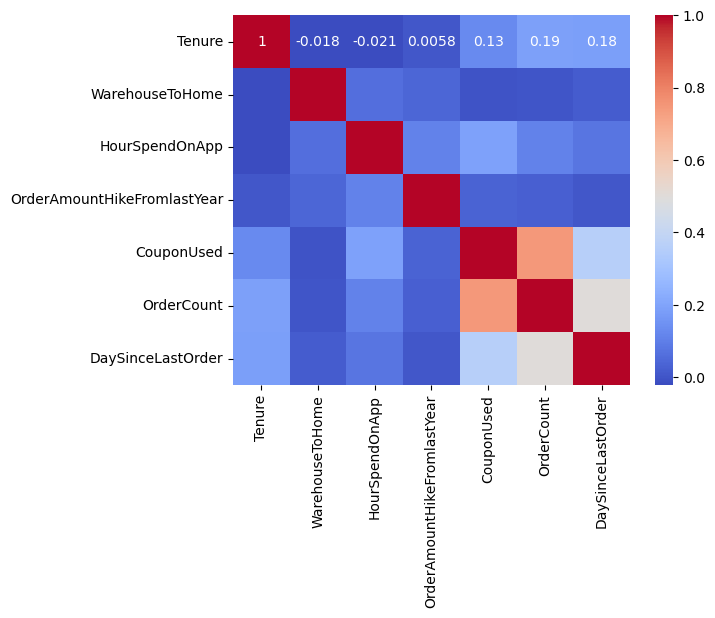

In [66]:
# Correlation matrix
correlation_matrix = df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
                         'CouponUsed', 'OrderCount', 'DaySinceLastOrder']].corr()

print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


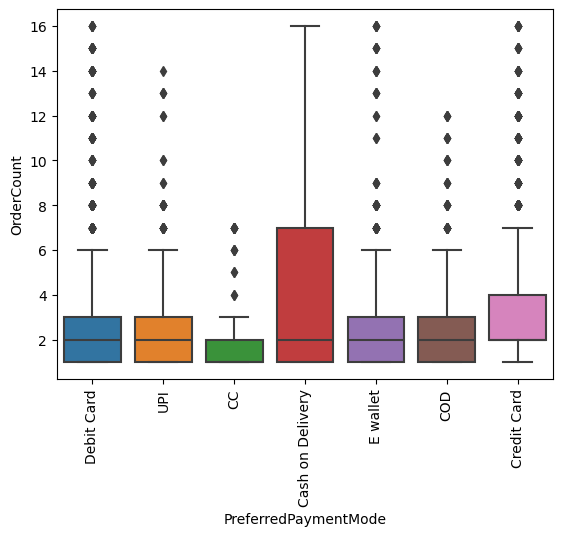

In [67]:
# Box Plot
sns.boxplot(x='PreferredPaymentMode', y='OrderCount', data=df)
plt.xticks(rotation=90)
plt.show()


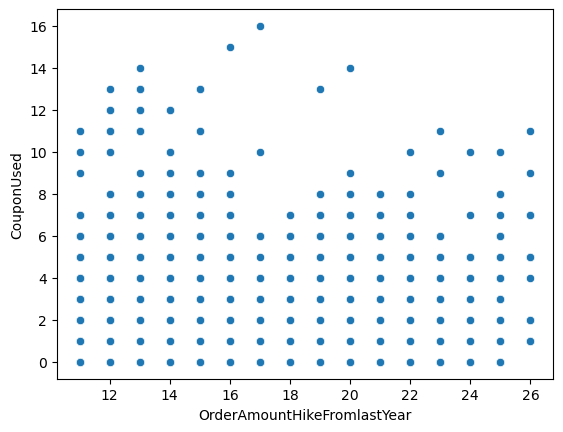

In [68]:
# Scatter plot
sns.scatterplot(x='OrderAmountHikeFromlastYear', y='CouponUsed', data=df)
plt.show()


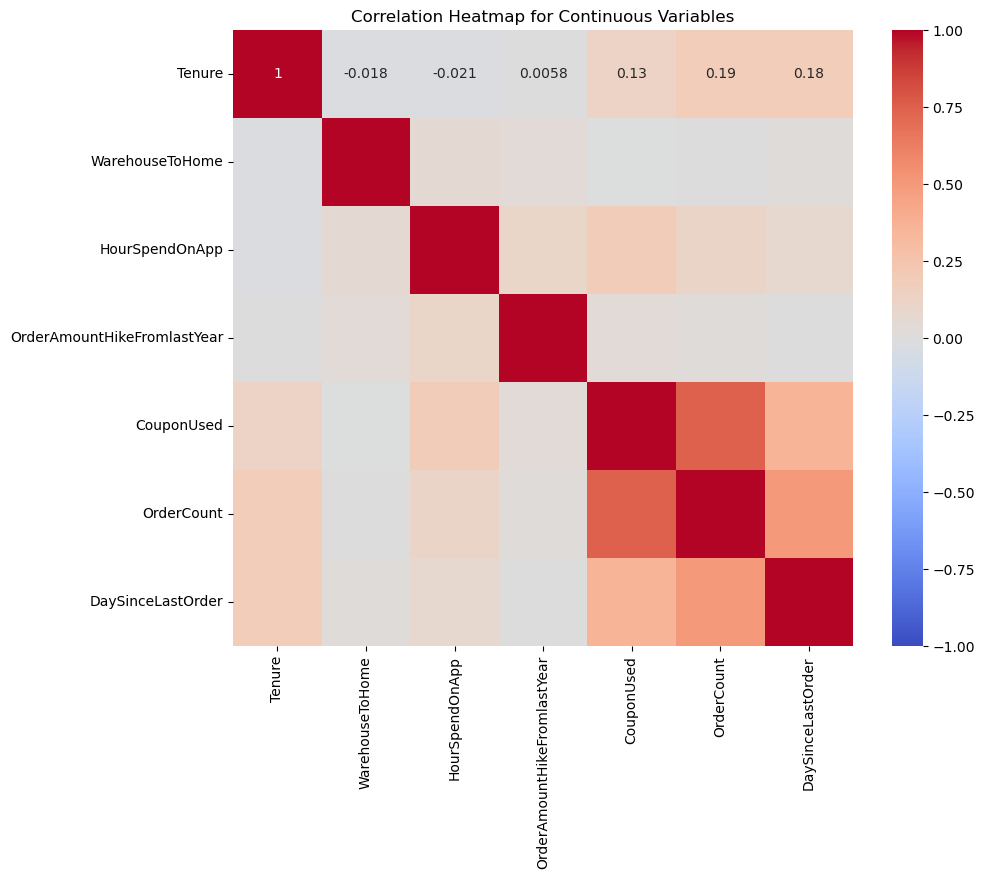

In [69]:
# Correlation matrix for continuous variables
continuous_vars = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 
                   'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

correlation_matrix = df[continuous_vars].corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Continuous Variables")
plt.show()

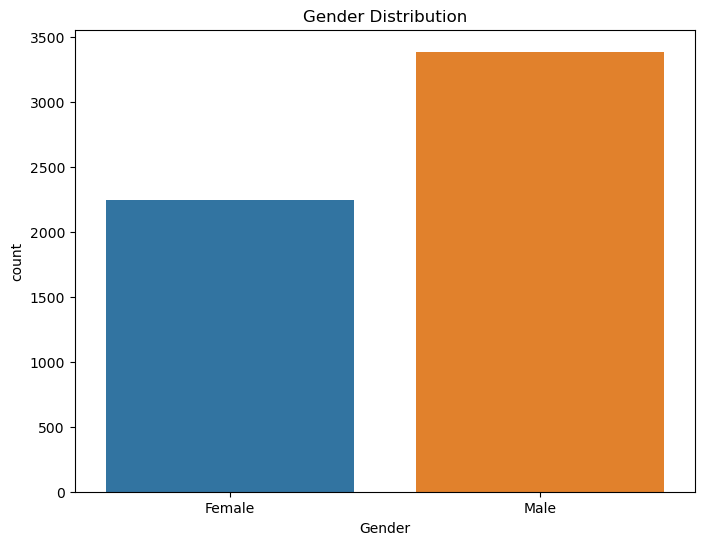

In [70]:
# Barplot for categorical variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


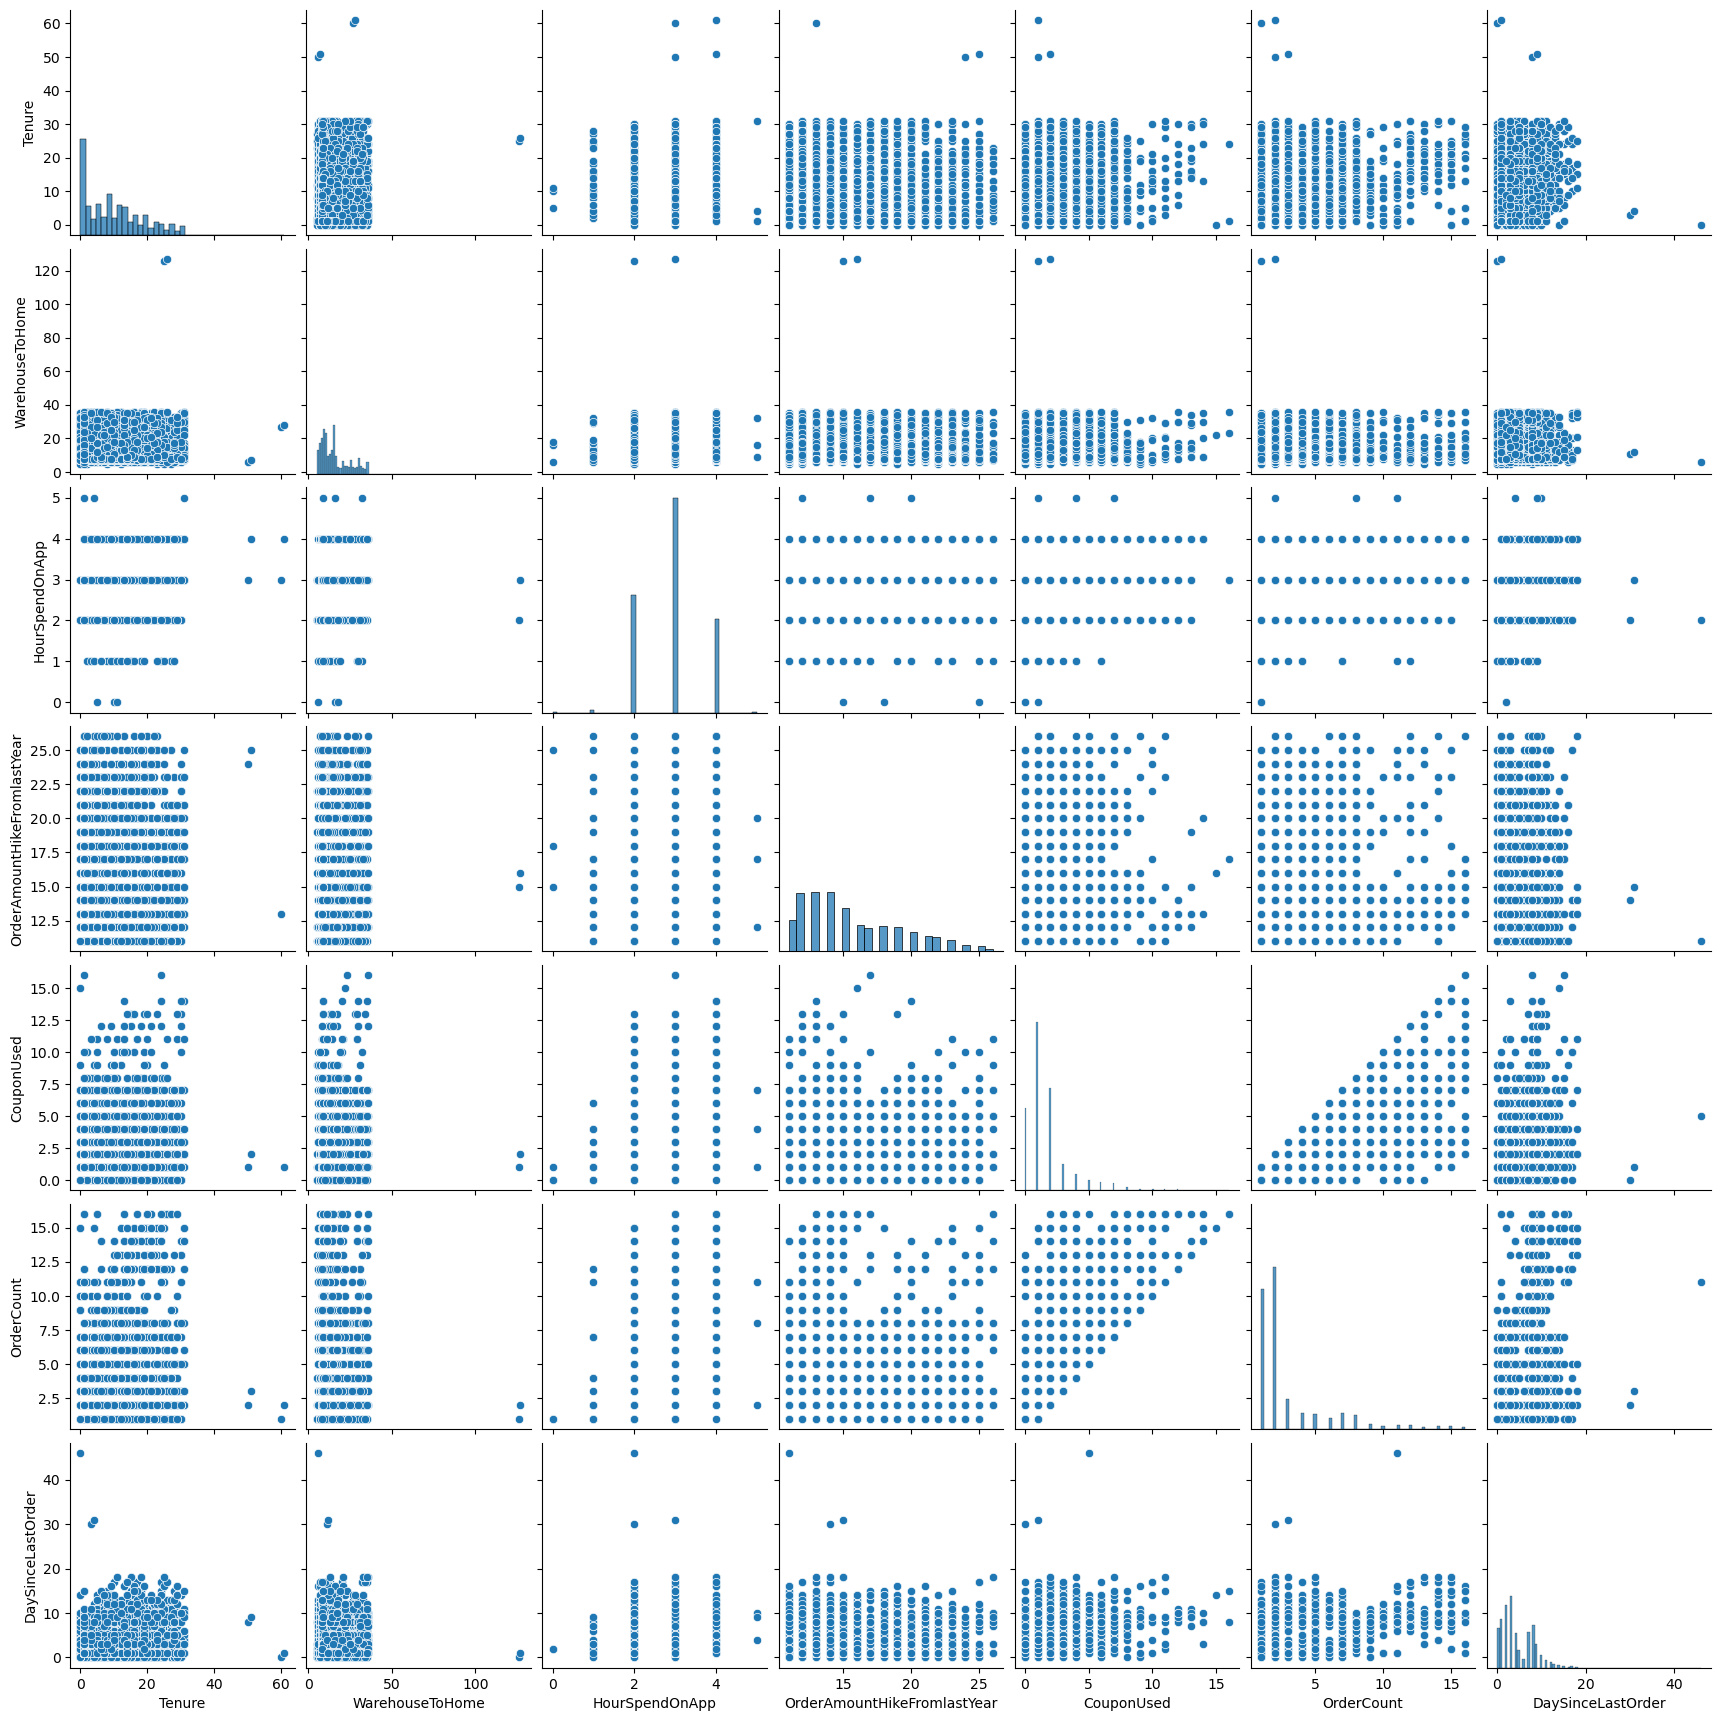

In [71]:
# Pairplot for continuous variables
sns.pairplot(df[continuous_vars])
plt.show()


## MULTIVARIATE ANALYSIS

<Figure size 1000x800 with 0 Axes>

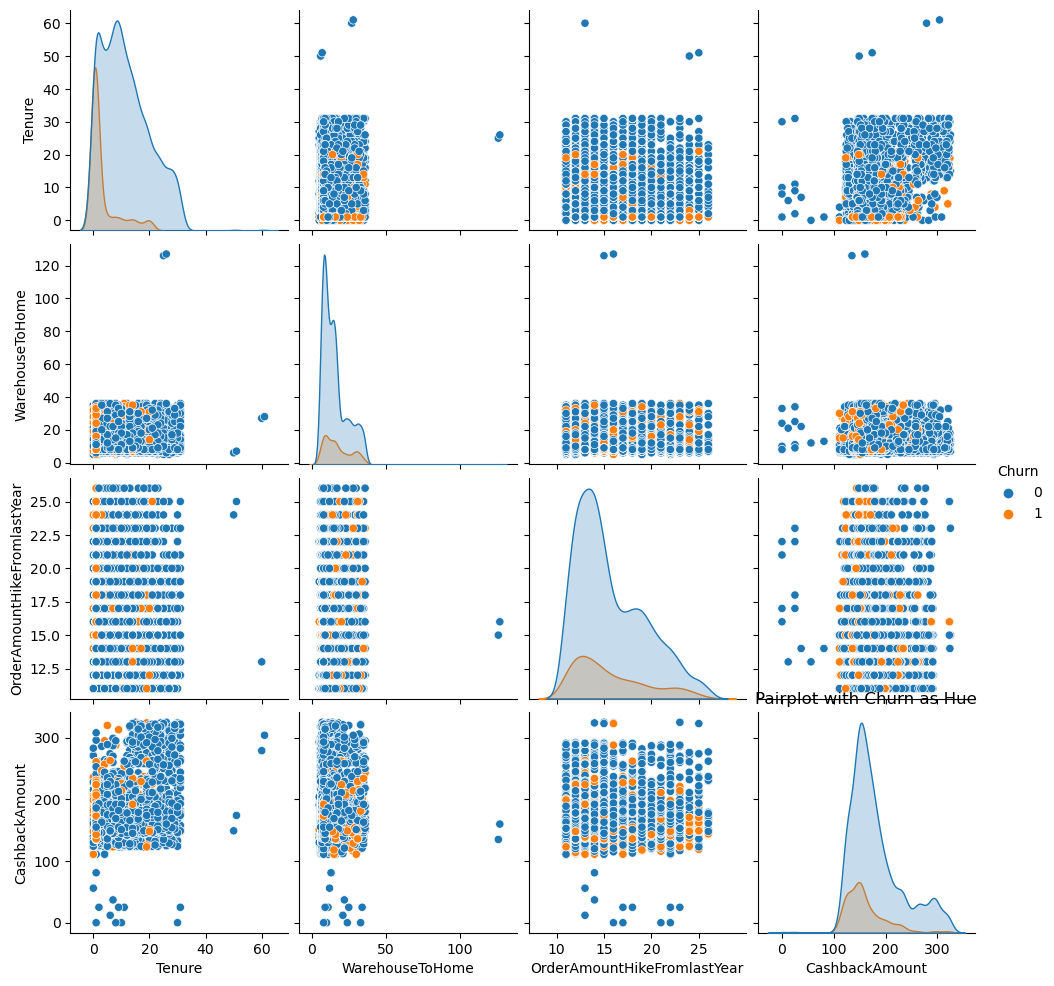

In [72]:
# Pairplot with 'Churn' as the hue (multivariate analysis with categorical separation)

plt.figure(figsize=(10, 8))
sns.pairplot(df, vars=['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CashbackAmount'], hue='Churn')
plt.title("Pairplot with Churn as Hue")
plt.show()


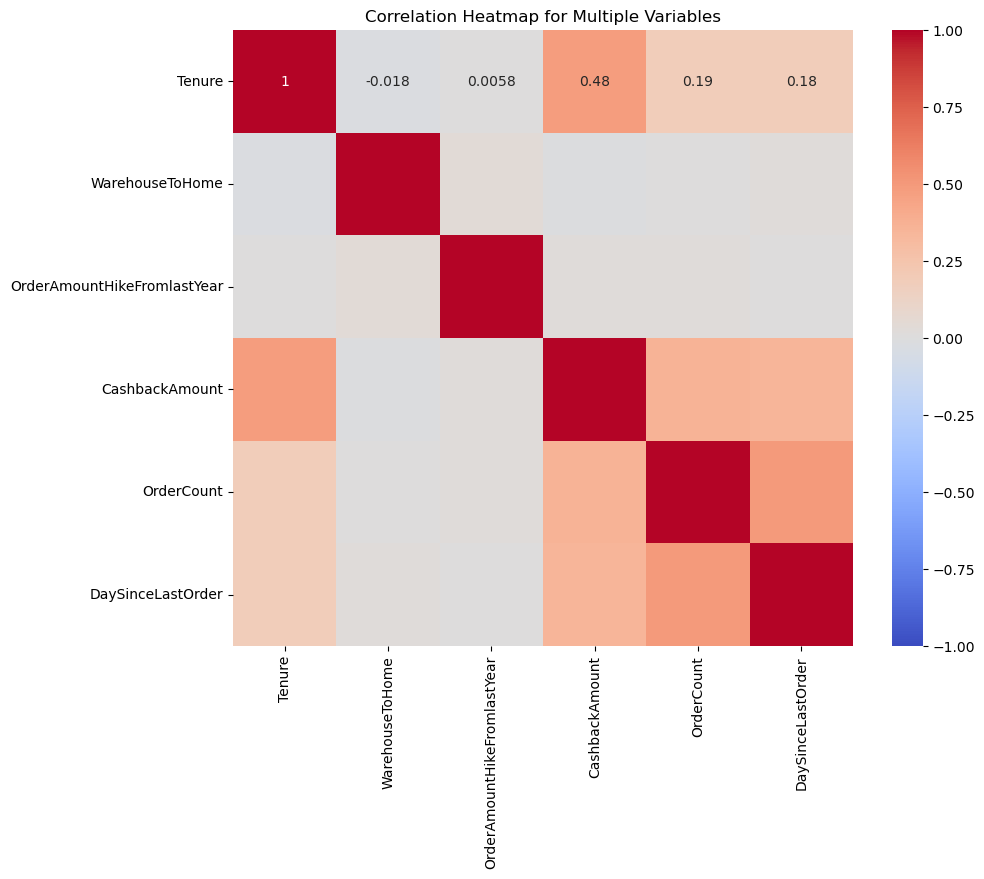

In [73]:
# Selecting relevant numerical variables
selected_columns = ['Tenure', 'WarehouseToHome', 'OrderAmountHikeFromlastYear', 'CashbackAmount', 'OrderCount', 'DaySinceLastOrder']

plt.figure(figsize=(10, 8))
correlation_matrix = df[selected_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Multiple Variables")
plt.show()


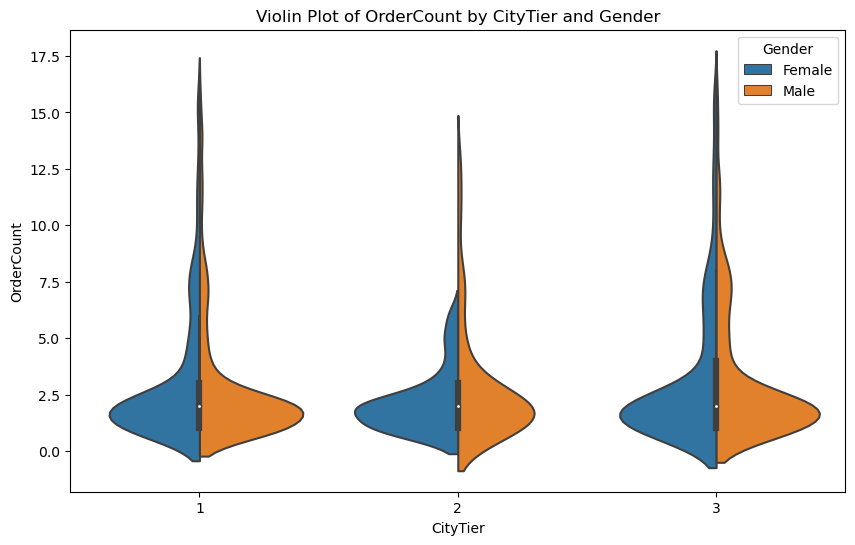

In [74]:
# Violin plot to analyze OrderCount by CityTier with Gender as hue
plt.figure(figsize=(10, 6))
sns.violinplot(x='CityTier', y='OrderCount', hue='Gender', data=df, split=True)
plt.title("Violin Plot of OrderCount by CityTier and Gender")
plt.show()


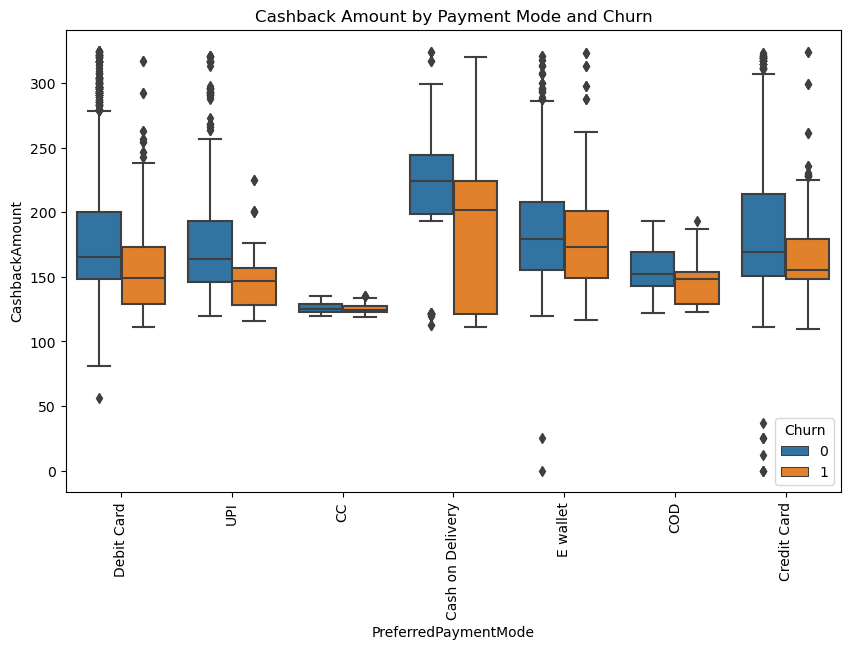

In [75]:
# Boxplot for CashbackAmount by PreferredPaymentMode and split by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='PreferredPaymentMode', y='CashbackAmount', hue='Churn', data=df)
plt.xticks(rotation=90)
plt.title("Cashback Amount by Payment Mode and Churn")
plt.show()


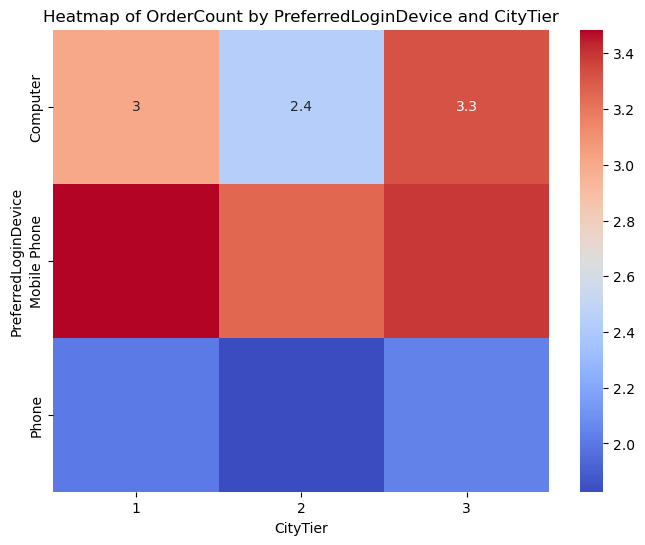

In [76]:
# Pivot the data to create a matrix for heatmap
heatmap_data = df.pivot_table(values='OrderCount', index='PreferredLoginDevice', columns='CityTier', aggfunc='mean')

# Heatmap for categorical variables vs continuous variable
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title("Heatmap of OrderCount by PreferredLoginDevice and CityTier")
plt.show()


In [77]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [78]:
df_churn=df.groupby(['CityTier','Tenure','Churn']).size().reset_index()

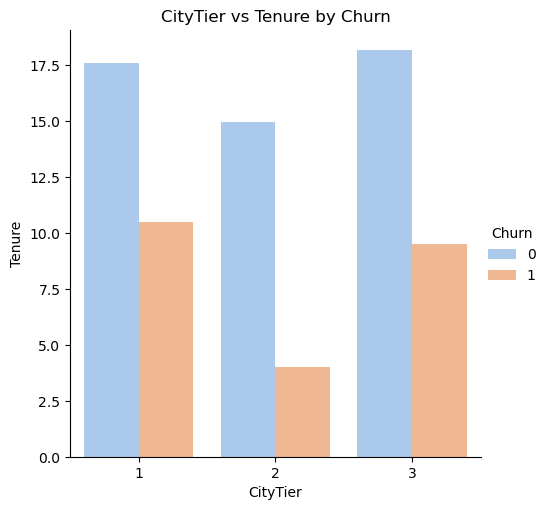

In [79]:
df_churn['Churn'] = df_churn['Churn'].astype('category')
df_churn['Churn'] = df_churn['Churn'].astype(str)
df_churn['CityTier'] = df_churn['CityTier'].astype('category')
sns.catplot(data=df_churn, x='CityTier', y='Tenure', hue='Churn', kind='bar', ci=None, palette='pastel')
plt.title('CityTier vs Tenure by Churn')
plt.show()


In [80]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [81]:
df_satisfy=df.groupby(['DaySinceLastOrder','HourSpendOnApp','SatisfactionScore','Complain']).size().reset_index().rename(columns={0:'No. of ppl'})

In [82]:
df_satisfy.head(5)

,DaySinceLastOrder,HourSpendOnApp,SatisfactionScore,Complain,No. of ppl
0,0.0,1.0,3,0,2
1,0.0,2.0,1,0,23
2,0.0,2.0,1,1,16
3,0.0,2.0,2,0,13
4,0.0,2.0,2,1,10


<Figure size 3000x2000 with 0 Axes>

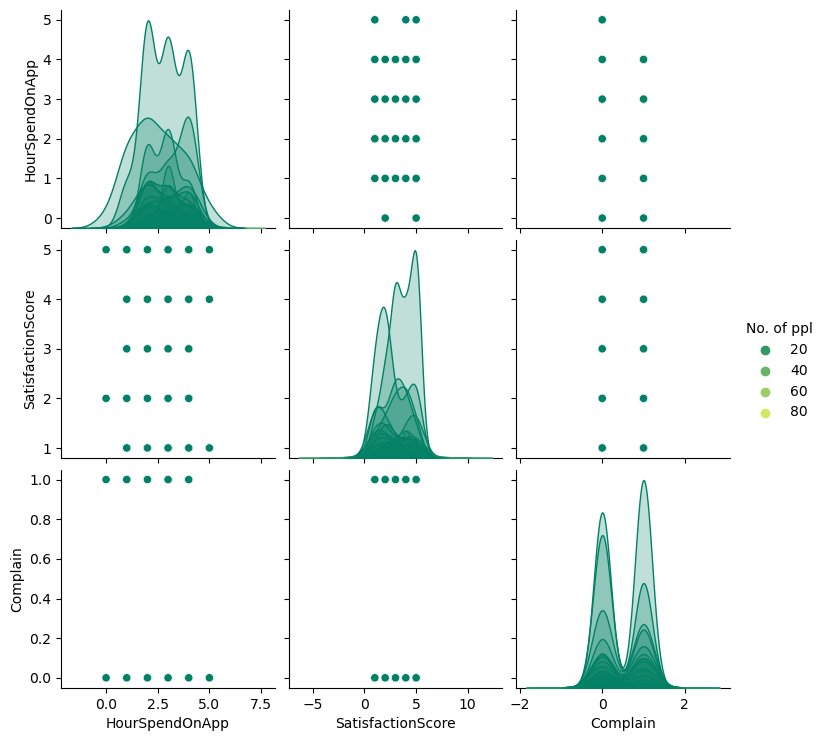

In [83]:
plt.figure(figsize=(30, 20))
sns.pairplot(df_satisfy, vars=['HourSpendOnApp', 'SatisfactionScore', 'Complain',],hue='No. of ppl', palette='summer')
#plt.title("Pairplot with No. of ppl as Hue")
plt.show()


In [84]:
df['Tenure'] = df['Tenure'].fillna(0)
bins = [0, 6, 24, float('inf')]  # 0-6 months, 6-24 months, and 24+ months
labels = ['Short-term', 'Mid-term', 'Long-term']

# Create a new column for Tenure categories
df['TenureCategory'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=False)

df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,2,Single,9,1,11.0,1.0,1.0,5.0,160,Short-term
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,...,3,Single,7,1,15.0,0.0,1.0,0.0,121,Short-term
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,3,Single,6,1,14.0,0.0,1.0,3.0,120,Short-term
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,5,Single,8,0,23.0,0.0,1.0,3.0,134,Short-term
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,5,Single,3,0,11.0,1.0,1.0,3.0,130,Short-term
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,...,5,Single,2,1,22.0,4.0,6.0,7.0,139,Short-term
6,50007,1,0.0,Phone,3,11.0,Cash on Delivery,Male,2.0,3,...,2,Divorced,4,0,14.0,0.0,1.0,0.0,121,Short-term
7,50008,1,0.0,Phone,1,6.0,CC,Male,3.0,3,...,2,Divorced,3,1,16.0,2.0,2.0,0.0,123,Short-term
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,...,3,Divorced,2,1,14.0,0.0,1.0,2.0,127,Mid-term
9,50010,1,0.0,Phone,1,31.0,Debit Card,Male,2.0,5,...,3,Single,2,0,12.0,1.0,1.0,1.0,123,Short-term


<Axes: ylabel='count'>

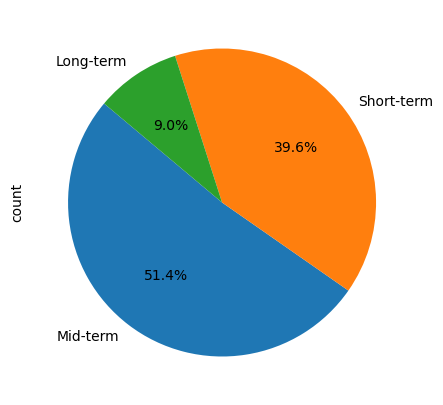

In [85]:
plt.figure(figsize=(8, 5))
df['TenureCategory'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)

In [86]:
# Define a new column: HighValueCustomer
df['HighValueCustomer'] = (
    (df['Tenure'] > 8) & 
    (df['OrderAmountHikeFromlastYear'] > 10) & 
    (df['SatisfactionScore'] > 3)
)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,TenureCategory,HighValueCustomer
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,...,Single,9,1,11.0,1.0,1.0,5.0,160,Short-term,False
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,...,Single,7,1,15.0,0.0,1.0,0.0,121,Short-term,False
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,...,Single,6,1,14.0,0.0,1.0,3.0,120,Short-term,False
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,...,Single,8,0,23.0,0.0,1.0,3.0,134,Short-term,False
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,...,Single,3,0,11.0,1.0,1.0,3.0,130,Short-term,False


In [87]:
df[df['HighValueCustomer']==True].groupby('CouponUsed').size().reset_index().rename(columns={0:'HighValueCustomers'})

,CouponUsed,HighValueCustomers
0,0.0,132
1,1.0,304
2,2.0,200
3,3.0,62
4,4.0,53
5,5.0,40
6,6.0,26
7,7.0,19
8,8.0,9
9,9.0,1


In [88]:
df_customers=df[df['HighValueCustomer']==True].groupby('CouponUsed').size().reset_index().rename(columns={0:'HighValueCustomers'})

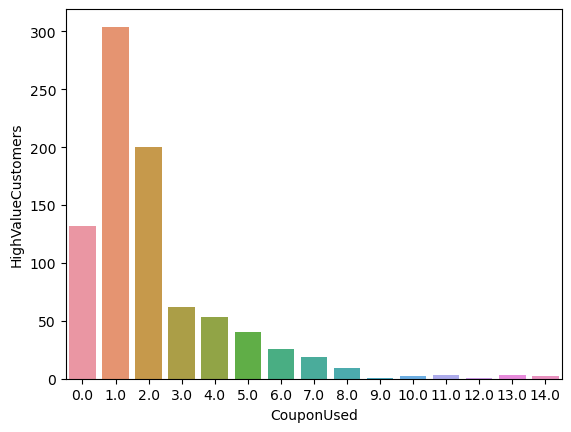

In [89]:
sns.barplot(x='CouponUsed', y='HighValueCustomers', data=df_customers)
plt.show()